# <span style="color:#336699">Web Time Series Service (WTSS) - Example</span>
<hr style="border:2px solid #0077b9;">

O exemplo de caso em destaque se refere a uma queimada que ocorreu entre as datas de 04/09/2022 e 17/09/2022 portanto seram adicionados exemplos de dados dessa queimada acessando os dados de série temporal de pontos tanto no interior da área considerada como queimada como no exterior dessa mesma área. foi possível determinar ondeo ocorreu a queimada graças ao uso de diferença de ndvi e nbr em uma boudbox sobre a reserva nacional de brasília

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives shows how to use the WTSS service to extract time series from <em>Brazil Data Cube</em>' service and how to perform a basic time series manipulation.
</div>

In [ ]:
# Função para ler o token de um arquivo
def read_token(file_path):
    with open(file_path, 'r') as file:
        token = file.read().strip()
    return token

# Caminho para o arquivo que contém o token
token_file_path = 'token.txt'

# Ler o token do arquivo
token = read_token(token_file_path)


In [ ]:
from wtss import *
import numpy as np
import pandas as pd

In [ ]:
service = WTSS('https://data.inpe.br/bdc/', access_token=token)

In [ ]:
f' https://data.inpe.br/bdc/wtss/v4/time_series?coverage=LANDSAT-16D-1&attributes=NDVI&start_date=2015-02-02&end_date=2022-02-02&latitude=-15.744345136761936&longitude=-47.97677993774415'



In [ ]:
import requests
import json
import pandas as pd

# Fazer a requisição
req = requests.get('https://data.inpe.br/bdc/wtss/v4/time_series?coverage=LANDSAT-16D-1&attributes=NDVI&start_date=2015-02-02&end_date=2022-02-02&latitude=-15.744345136761936&longitude=-47.97677993774415')

# Verificar se a requisição foi bem-sucedida
if req.status_code == 200:
    # Carregar os dados JSON diretamente
    data = req.json()
    
    # Extrair as datas e os valores
    dates = data['result']['timeline']
    values = data['result']['attributes'][0]['values']
    
    # Criar um DataFrame com as datas e valores
    df = pd.DataFrame({
        'Datas': dates,
        'Valores': values
    })
    
    # Exibir a tabela
    print(df)
else:
    print(f"Erro na requisição: {req.status_code}")


# criando uma função para englobar a análise de dados em série temporal 

não consegui acessar os dados na nova plataforma e por isso dei uma gerada a partir dos meus conhecimentos em séries temporais e o resultado está a baixo 

In [ ]:
import requests
import json
import pandas as pd

def fetch_time_series_data(coverage, attributes, start_date, end_date, latitude, longitude):
    # Construir a URL com os parâmetros fornecidos
    url = f'https://data.inpe.br/bdc/wtss/v4/time_series?coverage={coverage}&attributes={attributes}&start_date={start_date}&end_date={end_date}&latitude={latitude}&longitude={longitude}'
    
    # Fazer a requisição
    req = requests.get(url)
    
    # Verificar se a requisição foi bem-sucedida
    if req.status_code == 200:
        # Carregar os dados JSON diretamente
        data = req.json()
        
        # Extrair as datas e os valores
        dates = data['result']['timeline']
        values = data['result']['attributes'][0]['values']
        
        # Criar um DataFrame com as datas e valores
        df = pd.DataFrame({
            'Datas': dates,
            'Valores': valuesz
        })
        
        return df
    else:
        print(f"Erro na requisição: {req.status_code}")
        return None

# Exemplo de uso da função
coverage = 'LANDSAT-16D-1'
attributes = 'NDVI'
start_date = '2015-02-02'
end_date = '2022-02-02'
latitude = -15.744345136761936
longitude = -47.97677993774415

df = fetch_time_series_data(coverage, attributes, start_date, end_date, latitude, longitude)

if df is not None:
    print(df)


In [ ]:
x= 2530
xx=[]
for i in range(30):
    k=x+100*i
    for i in range(21):
        xx.append(k)
        k = k+1
        print(xx)
    k=k+80
    print(len(xx))

In [ ]:
import pandas as pd
from shapely.geometry import MultiPoint, Point

# Ler o arquivo CSV
df = pd.read_csv('grade_de_pontos.csv')

# Verificar se as colunas esperadas estão presentes
if 'latitude' in df.columns and 'longitude' in df.columns:
    # Criar uma lista de pontos
    points = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

    # Criar um objeto MultiPoint
    multipoint = MultiPoint(points)

    # Imprimir o resultado
    print(multipoint)
else:
    
    print("Colunas 'latitude' e 'longitude' não encontradas no arquivo CSV.")


In [ ]:
import requests
import pandas as pd

# URL do serviço (substitua pela URL correta do seu serviço)
url = 'https://data.inpe.br/bdc/wtss/v4?coverages=S2-16D-2'

# Fazer a solicitação
response = requests.get(url)
data = response.json()
print(data)

In [ ]:
import wtss
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint
import numpy as np
service = wtss.WTSS('https://data.inpe.br/bdc/wtss/v4/')

coverage = service['LANDSAT-16D-1']

lat_small = [-15.653116]  # Fixado


lon_small = [-48.065396]  # Fixado
for i in range(len(lat_small)):
    timeseries = coverage.ts(attributes = ('NDVI','nir08','swir22'),
                                    latitude = lat_small[0],
                                    longitude = lon_small[0],
                                    start_datetime = "2018-09-01",
                                    end_datetime = "2022-10-15")
df = timeseries.df()
timeseries.total_locations()
timeseries.plot()

plt.pause(5)

In [ ]:

import shapely.geometry
from wtss import WTSS
import numpy as np
service = WTSS('https://data.inpe.br/bdc/wtss/v4/')
coverage = service['LANDSAT-16D-1']
timeseries = coverage.ts(attributes=('NDVI','nir08','swir22'),
                            geom=shapely.geometry.MultiPoint([
                            shapely.geometry.Point(-59.60, -5.69),
                            ]),
                            start_datetime="2022-09-01", end_datetime="2022-11-30")

# Formatar a coluna datetime para mostrar apenas a data
df = timeseries.df()
df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')

# Criar listas para armazenar geometries, dates e NDVI values
geometries = df['geometry'].tolist()
dates = df['date'].tolist()
ndvi_values = df['value'].values.tolist()

# Criar um tensor com as listas
tensor = np.array([geometries, dates, ndvi_values], dtype=object)

# Imprimir o tensor
print("Tensor:")
rangeifinteress = int(len(tensor[1,:])/3)
for i in range(rangeifinteress):
    nir = tensor[2,i+rangeifinteress]
    swir =tensor[2,i+rangeifinteress*2]
    nbr =(nir-swir)/(nir+swir)
    ndvi = tensor[2,i]
    print(f'"date": {tensor[1,i+rangeifinteress]} nbr: {nbr}')# -> Linhas por tuplas
    print(f'"date" {tensor[1,i]} nfvi: {ndvi}')# -> Linhas por tuplas

# Escolhendo valores que segundo as áreas de interesse representam queimadas

De acordo com o visualizador gráfico é possivel pereceber que no intervalo gerado a baixo é onde existe a minha queimada e por isso gerei uma baldingbox ao redor dessa área

- entre os dias 08/09/2022 e 17/09/2022 houve uma queimada nessa área de interesse 

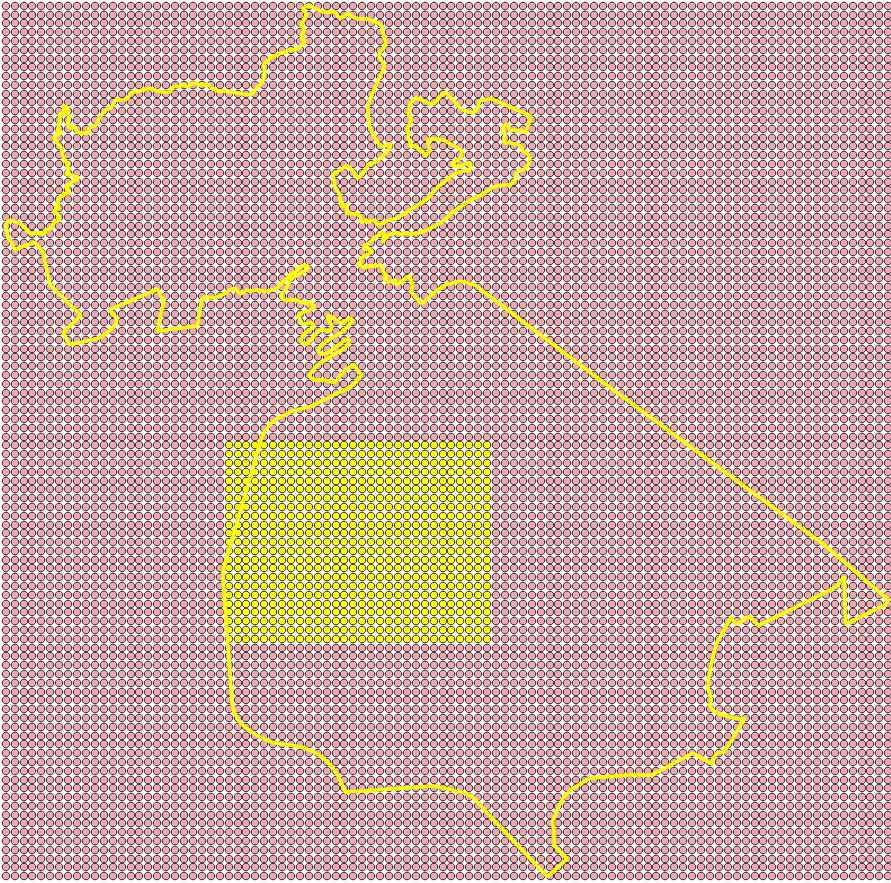

In [ ]:
# retangulo da área de interesse

x= 2530
xx=[]
for i in range(30):
    k=x+100*i
    for i in range(21):
        xx.append(k)
        k = k+1
        print(xx)
    k=k+80
    print(len(xx))

# adicionando lat e long

In [ ]:
import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv('grade_de_pontos.csv')

# Extrair as colunas de latitude e longitude
latitudes = df['latitude'].tolist()
longitudes = df['longitude'].tolist()

# Imprimir as listas
print("Latitudes:", latitudes)
print("Longitudes:", longitudes)


selecionando latlong somente dos valores de interesse

In [ ]:

x = 2530
xx = []
lat = []
long = []

# Certifique-se de que latitudes e longitudes têm comprimento suficiente
for i in range(30):
    k = x + 100 * i
    for j in range(21):  # Usei 'j' para evitar confusão com o loop externo
        if k < len(latitudes) and k < len(longitudes):  # Verifique os limites
            xx.append(k)
            lat.append(latitudes[k])  # Adiciona diretamente o valor
            long.append(longitudes[k])  # Adiciona diretamente o valor
        k += 1
print(xx)
print(len(lat))


# Extraindo a série temporal dos pontos de interesse



In [ ]:
import shapely.geometry
from wtss import WTSS
import numpy as np
import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv('grade_de_pontos.csv')

# Extrair as colunas de latitude e longitude
latitudes = df['latitude'].tolist()
longitudes = df['longitude'].tolist()

# Imprimir as listas
print("Latitudes:", latitudes)
print("Longitudes:", longitudes)

def nbr_from_nir_swir(j):
    nir = tensor[2, j + rangeifinteress]
    swir = tensor[2, j + rangeifinteress * 2] # Na lista é o terceirro grupo de informação
    nbr = (nir - swir) / ((nir + swir)+0.0001)
    return nbr 

def extracttimeseries(start_date='2022-08-01',end_date='2022-11-30',samples = 5,df='grade_de_pontos.csv',begningoftheboudingbox= 2530):
    # Pedir as datas de início e fim
    # start_date = input("Digite a data de início (YYYY-MM-DD): ")
    # end_date = input("Digite a data de fim (YYYY-MM-DD): ")
# Ler o arquivo CSV
    df = pd.read_csv(df)

    # Extrair as colunas de latitude e longitude
    latitudes = df['latitude'].tolist()
    longitudes = df['longitude'].tolist()

    # Imprimir as listas
    print("Latitudes:", latitudes)
    print("Longitudes:", longitudes)

    x = begningoftheboudingbox
    xx = []
    lat = []
    long = []

    # Certifique-se de que latitudes e longitudes têm comprimento suficiente
    for i in range(30):
        k = x + 100 * i
        for j in range(21):  # Usei 'j' para evitar confusão com o loop externo
            if k < len(latitudes) and k < len(longitudes):  # Verifique os limites
                xx.append(k)
                lat.append(latitudes[k])  # Adiciona diretamente o valor
                long.append(longitudes[k])  # Adiciona diretamente o valor
            k += 1

    start_date = start_date
    end_date = end_date


    service = WTSS('https://data.inpe.br/bdc/wtss/v4/')
    coverage = service['LANDSAT-16D-1']

    # Criar uma lista para armazenar os NBRs e NDVIs
    results = []
    infoforllama= []
    samples=samples
    # Loop pelas coordenadas
    rloc = np.random.randint(0,630,samples)
    for i in range(len(lat[:samples])):
        # Obter os dados de NDVI, nir08 e swir22 para a coordenada atual
        ii=int(rloc[i])
        try:
            timeseries = coverage.ts(attributes=('NDVI', 'nir08', 'swir22'),
                                    geom=shapely.geometry.MultiPoint([
                                        shapely.geometry.Point(long[ii], lat[ii]),
                                    ]),
                                    start_datetime=start_date,
                                    end_datetime=end_date)

            # Formatar a coluna datetime para mostrar apenas a data
            df = timeseries.df()
            print(df)
            if df.empty:
                print(f"Nenhum dado retornado para as coordenadas: ({long[ii]}, {lat[ii]})")
                continue  # Ir para a próxima iteração se não houver dados

            df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')

            # Criar listas para armazenar geometries, dates e NDVI values
            geometries = df['geometry'].tolist()
            dates = df['date'].tolist()
            attributes_values = df['value'].values.tolist()

            # Criar um tensor com as listas
            tensor = np.array([geometries, dates, attributes_values], dtype=object)

            # Calcular o NBR e armazenar na lista
            rangeifinteress = int(len(tensor[1, :]) / 3)
            for j in range(rangeifinteress):
                nbr = nbr_from_nir_swir(j)
                if (nbr) < 0.0002:
                    nbr1=nbr_from_nir_swir(j-1)
                    nbr2=nbr_from_nir_swir(j+1)
                    nbr= (nbr1+ nbr2) / 2
                    ndvi = (ndvi[j-1]+ nbr2[j+1]) / 2
                 # Obter o NDVI correspondente
                # Armazenar a data, NBR, NDVI e coordenadas
                results.append((tensor[1, j + rangeifinteress], nbr, ndvi, long[ii], lat[ii]))

        except Exception as e:
            print(f"Erro ao processar as coordenadas ({long[i]}, {lat[i]}): {e}")

    # Imprimir os resultados
    '''
    for date, nbr, ndvi, long, lat in results:
        print(f'Coordenadas: ({long}, {lat}), "date": {date}, NBR: {nbr}, NDVI: {ndvi}')
    '''

    
    return results

In [14]:
np.shape(results)

(99, 5)

In [ ]:
np.array(results)[:,0]

In [ ]:
results = extracttimeseries('2018-08-01','2022-12-01',1)

In [78]:
results[3]

('2022-09-30',
 -0.14665970772442588,
 0.2788,
 -48.004892114158906,
 -15.65561968502932)

In [107]:
def myatr(results,column):
    atribute = []
    for t in results:
        atribute.append((t[column]))
    print(atribute)
    return atribute


In [108]:
def makelistfromatr(results):
    lat = myatr(results,4)
    lon= myatr(results,3)
    date = myatr(results,0)
    ndvi = myatr(results,2)
    nbr = myatr(results,1)
    return lat,lon, date,ndvi,nbr

In [ ]:
lat,lon, date,ndvi,nbr = makelistfromatr(results)

In [ ]:
list_date = []
list_dNDVI = []
list_dNBR = []

for i in range(len(ndvi)-1):
    dndvi = - ndvi[i+1] +ndvi[i]
    dnbr= - nbr[i+1] +nbr[i]
    date_dndvi= date[i+1]
    list_date.append(date_dndvi)
    list_dNBR.append(dnbr)
    list_dNDVI.append(dndvi)
print(list_date,list_dNDVI,list_dNBR)

# Rodando o LLM

Modelos llama 3 e phi 3 

O phi 3 é um SLM que significa se tratar de um small language model 
phi 3 tem a versão short de 4k e como a ideia a priore não é testar a eficiência mas sim testar se abre com o uso de ollama então vou tentar testar enviar as informações de interesse no ollama

# Instalando o OLLAMA


para instalar segundo o site do [ollama](https://ollama.com/download) é necessário rodar a seguinte linha de código no sistema 

```
curl -fsSL https://ollama.com/install.sh | sh
```

# Adicionando o LLAMA3.1

```
ollama run llama3.1 

```

Dentre as opções de cara o sistema sugere a instalação da versão mais simples. 

Eu percebi que ele sugere a mais simples pois é o no qual tem menor dimensões. é um modelo de 4 gigas. Portanto o de 8 bilhões de atributos ou seja 8 bilhões de neurônios

Pois é sabido que existem 3 modelos do ollama 3.1 que são o de 8 bi, 76 bi e 405 bi de parâmetros

```
ollama run llama3.1 
```

In [1]:
!pip install ollama

In [5]:
import ollama

In [18]:
print(len(infoforllama))

25


In [19]:
aboutnbr='take this information as knowledge about nbr: specific indices have been developed that record the effects of fire with greater spectral contrast, such as the Normalized Burn Ratio (NBR), which is the normalized ratio of the difference of the near-infrared and shortwave-infrared bands. The combination of these latter bands makes it possible to analyze the phenomenon in pre- and post-fire conditions. In the NIR wavelengths, the absorbance of vegetation is low, whereas reflectance and transmittance are high; in the SWIR wavelengths, the reflectance and transmittance of the vegetation are low, and the absorbance is very high.'


In [117]:
response = ollama.chat(model='llama3.1', messages=[{
    'role': 'user',
    'content': f'SABENDO QUE para AS DATAS {list_date} os dNBR sÃO: {list_dNBR} e os dNDVI são: {list_dNDVI} o que você consegue entender dessa série temporal com relação a queimadas em que dia ocorreu uma queimada'
},
])
print(response['message']['content'])


A partir dos dados fornecidos sobre as datas e os valores de dNBR (Normalized Burn Ratio) e dNDVI (Normalized Difference Vegetation Index), não é possível determinar diretamente o dia da queimada apenas com esses dados. A explicação está nos seguintes pontos:

- **dNBR**: Esse valor mede a intensidade do combustão ou a quantidade de combustível consumido em um incêndio. Por exemplo, um valor alto (como 0.2261112835317472) sugere uma queimada intensa, enquanto um valor baixo (como -0.02863450844440532) pode indicar uma queimada menor ou controlada.
  
- **dNDVI**: Esse índice mede a densidade da vegetação ao redor de um local. Um valor alto indica áreas verdes e com vegetação, enquanto um valor baixo pode sugerir desmatamento ou áreas não cobertas por vegetação.

A partir dessas informações:

1. **Datas das Queimadas**: As datas específicas ('2022-08-29', '2022-09-14', etc.) fornecidas não relacionam diretamente aos valores de dNBR e dNDVI, mas sim representam os dias em que as medições

In [ ]:
print(infoforllama)

In [34]:
# Use a pipeline as a high-level helper
from transformers import pipeline
import torch
device = 0 if torch.cuda.is_available() else -1

pipe = pipeline("table-question-answering", model="Meena/table-question-answering-tapas", device=device)

In [96]:
from transformers import AutoTokenizer, TapasForQuestionAnswering
import pandas as pd

tokenizer = AutoTokenizer.from_pretrained("google/tapas-base-finetuned-wtq")
model = TapasForQuestionAnswering.from_pretrained("google/tapas-base-finetuned-wtq")

data =  {
    "lat": lat,
    "lon": lon, 
    "date": date,
    "NDVI": ndvi,
    "nbr": nbr,
}
table = pd.DataFrame.from_dict(data)
queries = [f"knowing this: {aboutnbr} and this: {aboutswir} what could you understand from the data"]

inputs = tokenizer(table=table, queries=queries, padding="max_length", return_tensors="pt")
outputs = model(**inputs)

logits = outputs.logits
logits_aggregation = outputs.logits_aggregation

/home/queimadas/miniconda3/envs/wtssanalysis/lib/python3.12/site-packages/transformers/models/tapas/tokenization_tapas.py:2673: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = normalize_for_match(row[col_index].text)
/home/queimadas/miniconda3/envs/wtssanalysis/lib/python3.12/site-packages/transformers/models/tapas/tokenization_tapas.py:1472: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell = row[col_index]
Token indices sequence length is longer than the specified maximum sequence length for this model (519 > 512). Running this sequence through the model will result in indexing errors.


In [ ]:

# Install from https://github.com/DepthAnything/Depth-Anything-V2

# Load the model and infer depth from an image
import cv2
import torch

from depth_anything_v2.dpt import DepthAnythingV2

# instantiate the model
model = DepthAnythingV2(encoder="vits", features=64, out_channels=[48, 96, 192, 384])

# load the weights
filepath = hf_hub_download(repo_id="depth-anything/Depth-Anything-V2-Small", filename="depth_anything_v2_vits.pth", repo_type="model")
state_dict = torch.load(filepath, map_location="cpu")
model.load_state_dict(state_dict).eval()

raw_img = cv2.imread("your/image/path")
depth = model.infer_image(raw_img) # HxW raw depth map in numpy
    

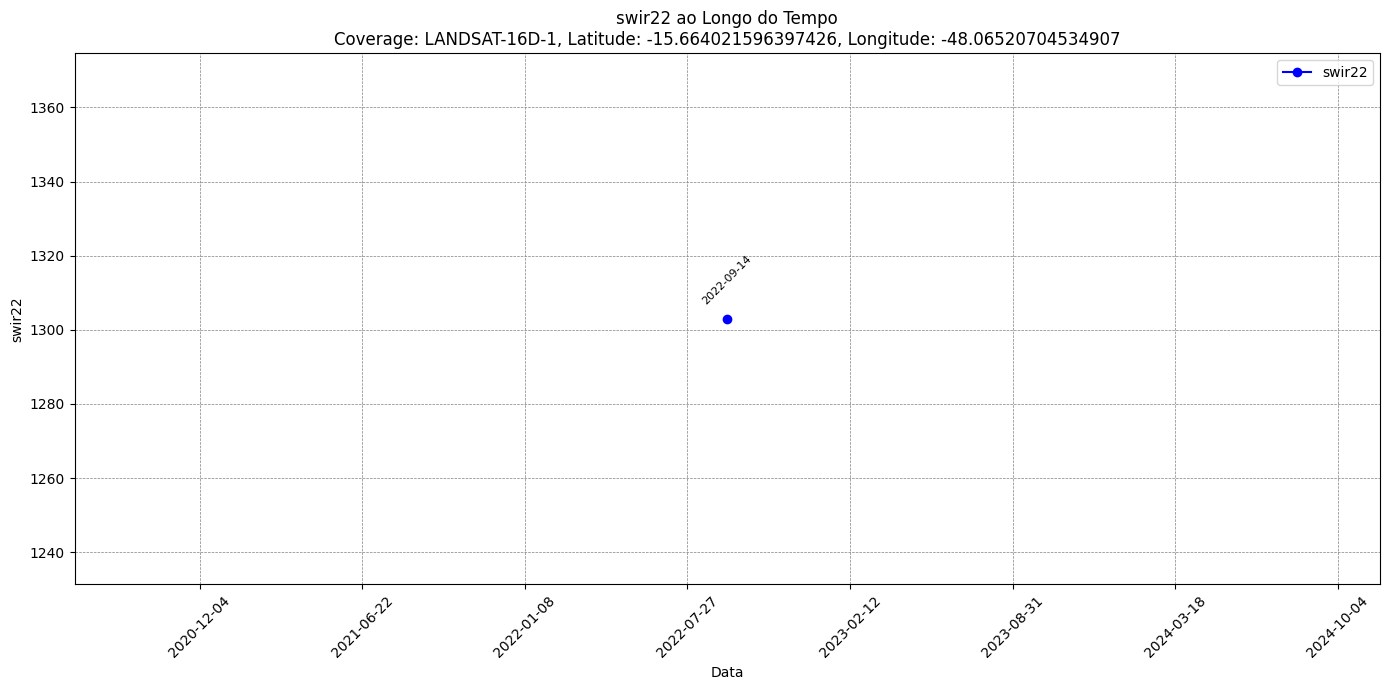

In [31]:
import matplotlib.pyplot as plt
import requests
from datetime import datetime

def plot_ndvi(coverage, start_date, end_date, latitude, longitude, indice='NDVI'):
    # URL base do serviço
    base_url = "https://data.inpe.br/bdc/wtss/v4/time_series"
    
    # Monta a URL com os parâmetros fornecidos
    url = f"{base_url}?coverage={coverage}&attributes={indice},EVI&start_date={start_date}&end_date={end_date}&latitude={latitude}&longitude={longitude}"
    
    # Faz a requisição para obter os dados
    response = requests.get(url)
    data = response.json()
    
    # Verifica se a resposta contém dados
    if 'result' not in data or 'attributes' not in data['result']:
        print("Erro ao obter dados. Verifique a URL e os parâmetros.")
        return

    # Extrai os dados NDVI e a linha do tempo
    ndvi_values = data['result']['attributes'][0]['values']
    timeline = data['result']['timeline']

    # Converte as datas da linha do tempo para o formato datetime
    dates = [datetime.strptime(date, "%Y-%m-%d") for date in timeline]

    # Cria o gráfico
    plt.figure(figsize=(14, 7))
    
    # Plota os dados com linha e pontos
    plt.plot(dates, ndvi_values, marker='o', linestyle='-', color='b', label=f'{indice}')
    
    # Adiciona anotações para cada ponto de dados
    for i, (date, value) in enumerate(zip(dates, ndvi_values)):
        plt.annotate(date.strftime('%Y-%m-%d'), (dates[i], ndvi_values[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, rotation=45)
    
    # Configura os rótulos e título
    plt.xlabel('Data')
    plt.ylabel(f'{indice}')
    plt.title(f'{indice} ao Longo do Tempo\nCoverage: {coverage}, Latitude: {latitude}, Longitude: {longitude}')
    
    # Ajusta a exibição dos ticks no eixo X
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Limita o número de ticks no eixo X
    
    # Adiciona o grid de forma sutil
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

    # Adiciona a legenda
    plt.legend()

    # Ajusta o layout para que os rótulos das datas não fiquem sobrepostos
    plt.tight_layout()

    # Exibe o gráfico
    plt.show()

# Exemplo de uso da função
coverage = "LANDSAT-16D-1"
start_date = "2022-09-01"
end_date = "2022-09-17"
latitude = -15.664021596397426
longitude = -48.06520704534907

plot_ndvi(coverage, start_date, end_date, latitude, longitude, 'swir22')
#https://data.inpe.br/bdc/wtss/v4/time_series?coverage=LANDSAT-16D-1&attributes=swir22,nir08,NDVI&start_date=2019-09-01&end_date=2019-09-17&latitude=-15.662199649856566&longitude=-48.05586758973513

In [23]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

# Carregar o GeoPackage
gpkg_path = '/home/queimadas/Documents/INPE/git/2_trimestre/GEOINFO/geo_info_trabalhos/timeseries/bbox_teste.gpkg'
layer_name = 'bbox_teste'  # Substitua pelo nome da camada que você deseja usar
gdf = gpd.read_file(gpkg_path, layer=layer_name)
# Determinar o retângulo de bounding box do shapefile
bounds = gdf.total_bounds  # (xmin, ymin, xmax, ymax)
xmin, ymin, xmax, ymax = bounds

# Número de pontos na malha
num_x_points = 1000  # número de pontos no eixo x
num_y_points = 1000  # número de pontos no eixo y

# Gerar uma malha regular de pontos
x_coords = np.linspace(xmin, xmax, num_x_points)
y_coords = np.linspace(ymin, ymax, num_y_points)
grid_points = [Point(x, y) for x in x_coords for y in y_coords]

# Criar uma GeoDataFrame para os pontos
points_gdf = gpd.GeoDataFrame(geometry=grid_points, crs=gdf.crs)

# Filtrar pontos que estão dentro do shapefile
intersecting_points = points_gdf[points_gdf.geometry.within(gdf.unary_union)]

# Salvar os pontos que intersectam com o shapefile
intersecting_points.to_file('pontos_intersectantes.gpkg', driver='GPKG')


/tmp/ipykernel_1603005/3945106756.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  intersecting_points = points_gdf[points_gdf.geometry.within(gdf.unary_union)]


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Carregar os shapefiles
pontos_intersectantes = gpd.read_file('pontos_intersectantes_1000.gpkg')
tabela_interseccao = gpd.read_file('2019_09_16.gpkg')

# Adicionar as colunas 'queimada', 'latitude', 'longitude', e 'epsg'
pontos_intersectantes['queimada'] = 0
pontos_intersectantes['latitude'] = pontos_intersectantes.geometry.centroid.y
pontos_intersectantes['longitude'] = pontos_intersectantes.geometry.centroid.x
pontos_intersectantes['epsg'] = pontos_intersectantes.crs.to_string() if pontos_intersectantes.crs else 'Unknown'

# Verificar interseções e atualizar a coluna 'queimada'
for i, ponto in pontos_intersectantes.iterrows():
    ponto_geom = ponto.geometry
    interseccionado = tabela_interseccao[tabela_interseccao.geometry.intersects(ponto_geom)]
    if not interseccionado.empty:
        pontos_intersectantes.at[i, 'queimada'] = 1

# Salvar o shapefile atualizado
pontos_intersectantes.to_file('pontos_intersectantes_1000_atualizado.shp')


In [32]:
import pandas as pd
from pyproj import Transformer

# Carregar o arquivo CSV
df = pd.read_csv('/home/queimadas/Documents/INPE/git/2_trimestre/GEOINFO/geo_info_trabalhos/timeseries/queimadas_2019_setembro.csv')

# Definir o sistema de referência original (EPSG 31983)
src_epsg = 31983
# Definir o sistema de referência de destino (EPSG 4326)
dst_epsg = 4326

# Criar um Transformer para converter entre os sistemas de referência
transformer = Transformer.from_crs(src_epsg, dst_epsg, always_xy=True)

# Função para transformar coordenadas
def transform_coords(x, y):
    lon, lat = transformer.transform(x, y)
    return pd.Series([lat, lon])

# Aplicar a transformação às coordenadas
df[['latitude', 'longitude']] = df.apply(lambda row: transform_coords(row['longitude'], row['latitude']), axis=1)

# Atualizar o EPSG para 4326
df['epsg'] = dst_epsg

# Salvar o DataFrame atualizado em um novo arquivo CSV
df.to_csv('seu_arquivo_transformado.csv', index=False)


In [36]:
import pandas as pd
import requests

# Função para obter dados da API
def fetch_data(latitude, longitude, start_date, end_date):
    url = f"https://data.inpe.br/bdc/wtss/v4/time_series?coverage=LANDSAT-16D-1&attributes=swir22,nir08,NDVI&start_date={start_date}&end_date={end_date}&latitude={latitude}&longitude={longitude}"
    response = requests.get(url)
    response.raise_for_status()  # Levanta um erro se a requisição falhar
    return response.json()

# Função para extrair os últimos valores
def extract_last_values(data):
    if 'result' in data and 'attributes' in data['result']:
        attributes = data['result']['attributes']
        last_values = {}
        for attr in attributes:
            attr_name = attr['attribute']
            if attr['values']:
                last_values[attr_name] = attr['values'][-1]  # Pega o último valor
        return last_values
    return {}

# Carregar o arquivo CSV
df = pd.read_csv('seu_arquivo_transformado.csv')

# Criar listas para armazenar os valores
swir22_values = []
nir08_values = []
ndvi_values = []

# Processar cada linha do CSV
for index, row in df.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    start_date = '2019-09-01'  # Adapte se necessário
    end_date = '2019-09-17'  # Adapte se necessário

    # Buscar os dados da API
    data = fetch_data(latitude, longitude, start_date, end_date)

    # Extrair os últimos valores
    last_values = extract_last_values(data)

    # Adicionar os valores às listas
    swir22_values.append(last_values.get('swir22', None))
    nir08_values.append(last_values.get('nir08', None))
    ndvi_values.append(last_values.get('NDVI', None))

# Adicionar as novas colunas ao DataFrame
df['swir22_last'] = swir22_values
df['nir08_last'] = nir08_values
df['ndvi_last'] = ndvi_values

# Salvar o DataFrame atualizado em um novo arquivo CSV
df.to_csv('queimadas_atualizadas_2019.csv', index=False)


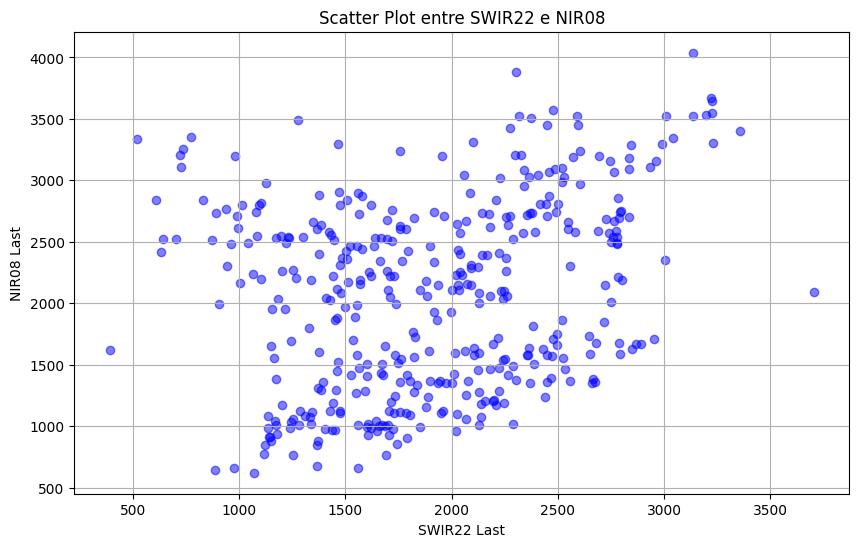

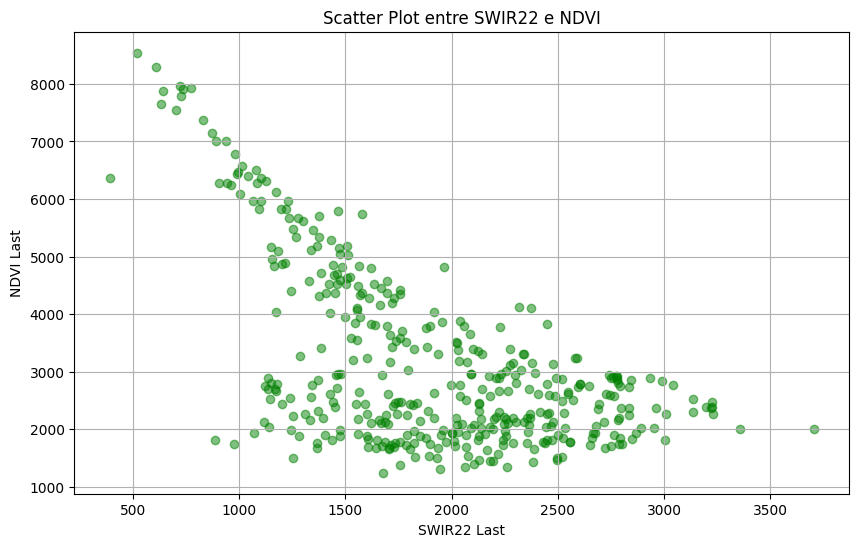

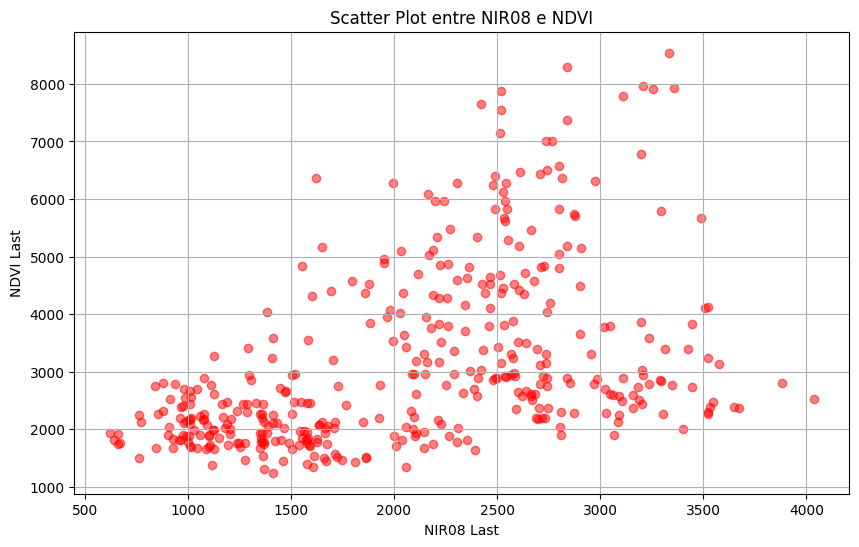

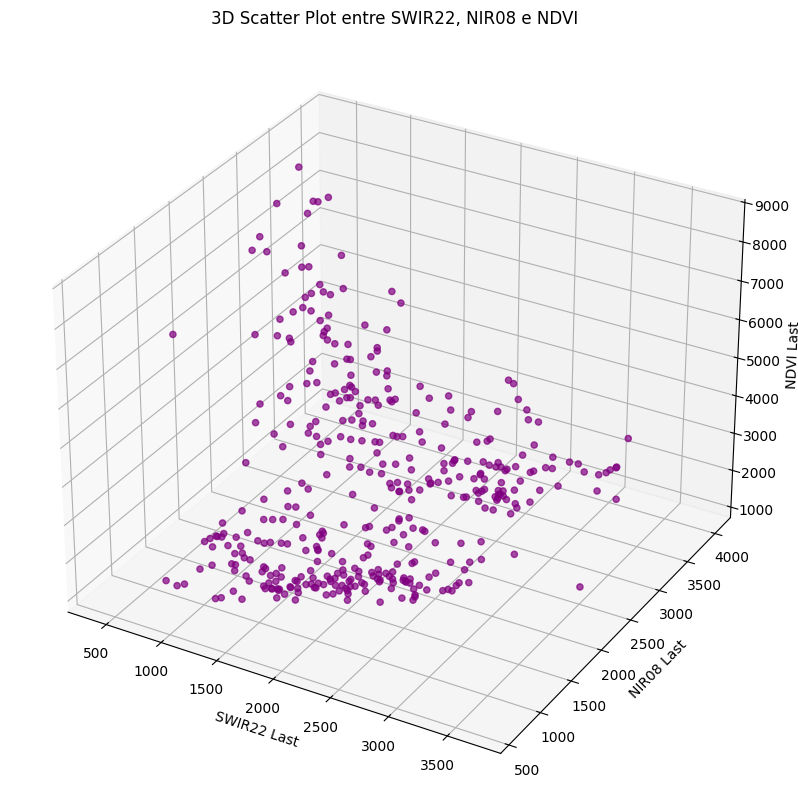

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Carregar o arquivo CSV
df = pd.read_csv('/home/queimadas/Documents/INPE/git/2_trimestre/GEOINFO/geo_info_trabalhos/timeseries/queimadas_atualizadas_2019.csv')

# Scatter Plot entre swir22_last e nir08_last
plt.figure(figsize=(10, 6))
plt.scatter(df['swir22_last'], df['nir08_last'], c='blue', marker='o', alpha=0.5)
plt.title('Scatter Plot entre SWIR22 e NIR08')
plt.xlabel('SWIR22 Last')
plt.ylabel('NIR08 Last')
plt.grid(True)
plt.show()

# Scatter Plot entre swir22_last e ndvi_last
plt.figure(figsize=(10, 6))
plt.scatter(df['swir22_last'], df['ndvi_last'], c='green', marker='o', alpha=0.5)
plt.title('Scatter Plot entre SWIR22 e NDVI')
plt.xlabel('SWIR22 Last')
plt.ylabel('NDVI Last')
plt.grid(True)
plt.show()

# Scatter Plot entre nir08_last e ndvi_last
plt.figure(figsize=(10, 6))
plt.scatter(df['nir08_last'], df['ndvi_last'], c='red', marker='o', alpha=0.5)
plt.title('Scatter Plot entre NIR08 e NDVI')
plt.xlabel('NIR08 Last')
plt.ylabel('NDVI Last')
plt.grid(True)
plt.show()

# Scatter Plot 3D para visualizar as três variáveis juntas
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['swir22_last'], df['nir08_last'], df['ndvi_last'], c='purple', marker='o', alpha=0.7)
ax.set_title('3D Scatter Plot entre SWIR22, NIR08 e NDVI')
ax.set_xlabel('SWIR22 Last')
ax.set_ylabel('NIR08 Last')
ax.set_zlabel('NDVI Last')
plt.show()


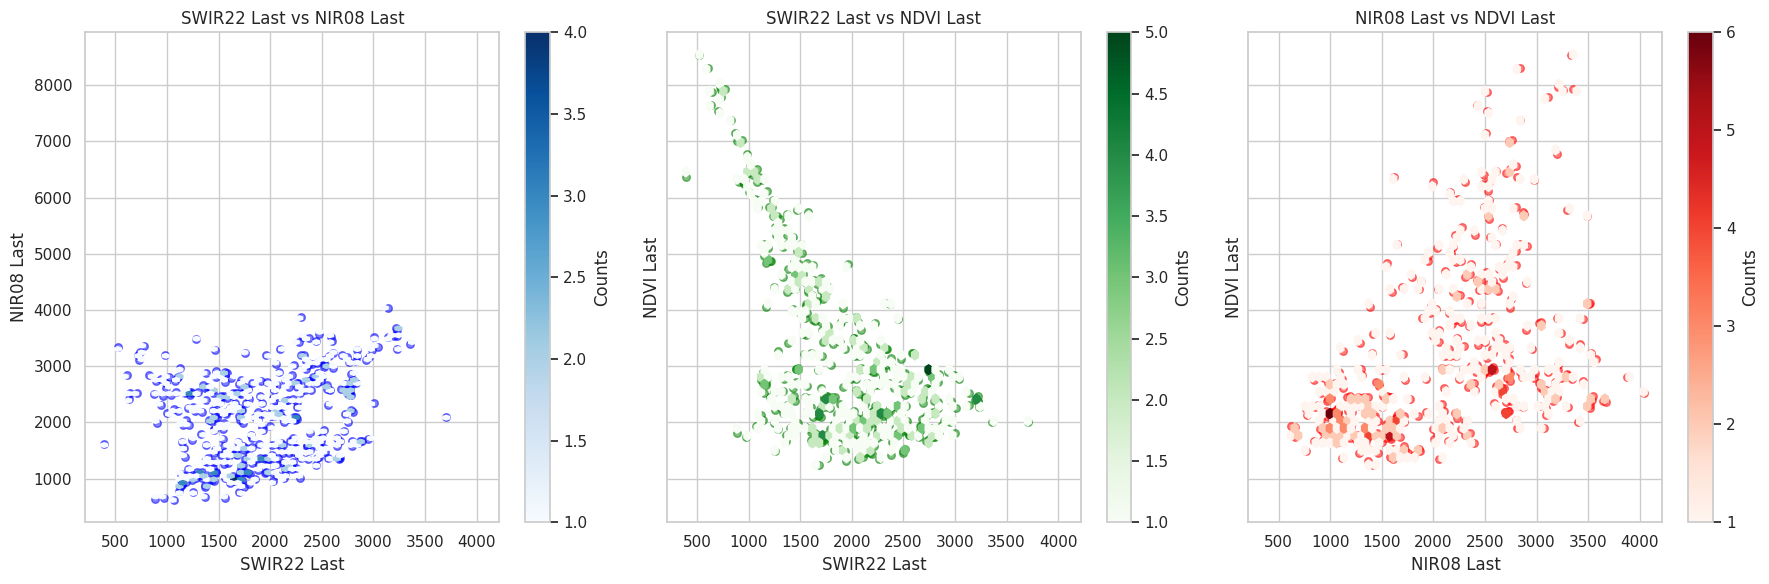

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o arquivo CSV
df = pd.read_csv('/home/queimadas/Documents/INPE/git/2_trimestre/GEOINFO/geo_info_trabalhos/timeseries/queimadas_atualizadas_2019.csv')

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar uma figura com subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Scatter Plot e Heatmap de Densidade entre swir22_last e nir08_last
axs[0].scatter(df['swir22_last'], df['nir08_last'], c='blue', alpha=0.5, s=30)
axs[0].set_title('SWIR22 Last vs NIR08 Last')
axs[0].set_xlabel('SWIR22 Last')
axs[0].set_ylabel('NIR08 Last')
axs[0].grid(True)

# Heatmap de densidade
hb = axs[0].hexbin(df['swir22_last'], df['nir08_last'], gridsize=50, cmap='Blues', mincnt=1)
cb = plt.colorbar(hb, ax=axs[0])
cb.set_label('Counts')

# Scatter Plot e Heatmap de Densidade entre swir22_last e ndvi_last
axs[1].scatter(df['swir22_last'], df['ndvi_last'], c='green', alpha=0.5, s=30)
axs[1].set_title('SWIR22 Last vs NDVI Last')
axs[1].set_xlabel('SWIR22 Last')
axs[1].set_ylabel('NDVI Last')
axs[1].grid(True)

# Heatmap de densidade
hb = axs[1].hexbin(df['swir22_last'], df['ndvi_last'], gridsize=50, cmap='Greens', mincnt=1)
cb = plt.colorbar(hb, ax=axs[1])
cb.set_label('Counts')

# Scatter Plot e Heatmap de Densidade entre nir08_last e ndvi_last
axs[2].scatter(df['nir08_last'], df['ndvi_last'], c='red', alpha=0.5, s=30)
axs[2].set_title('NIR08 Last vs NDVI Last')
axs[2].set_xlabel('NIR08 Last')
axs[2].set_ylabel('NDVI Last')
axs[2].grid(True)

# Heatmap de densidade
hb = axs[2].hexbin(df['nir08_last'], df['ndvi_last'], gridsize=50, cmap='Reds', mincnt=1)
cb = plt.colorbar(hb, ax=axs[2])
cb.set_label('Counts')

# Ajustar layout
plt.tight_layout()
plt.show()


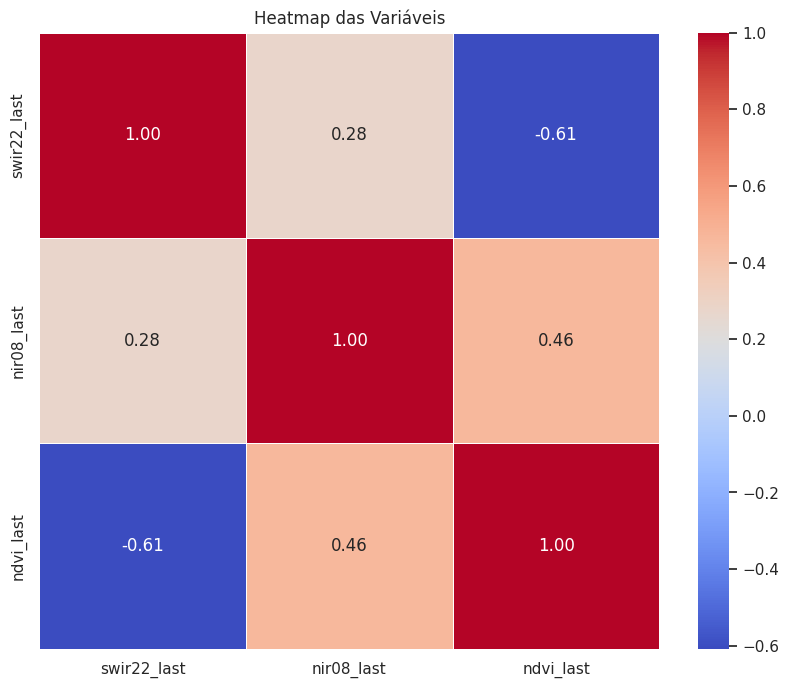

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados CSV
data = pd.read_csv('/home/queimadas/Documents/INPE/git/2_trimestre/GEOINFO/geo_info_trabalhos/timeseries/queimadas_atualizadas_2019.csv')

# Selecionar as colunas relevantes
data_filtered = data[['swir22_last', 'nir08_last', 'ndvi_last']]

# Calcular a matriz de correlação
correlation_matrix = data_filtered.corr()

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap das Variáveis')
plt.show()


Acurácia: 0.925
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        58
           1       0.96      0.89      0.92        62

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120

Matriz de Confusão:
 [[56  2]
 [ 7 55]]


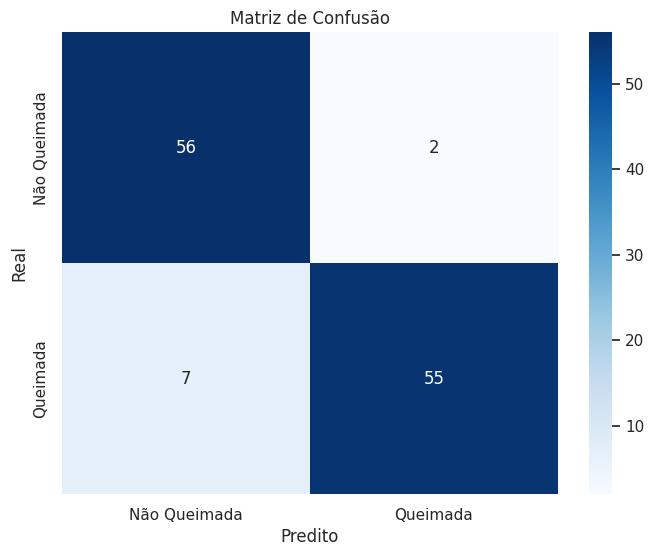

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados CSV
data = pd.read_csv('/home/queimadas/Documents/INPE/git/2_trimestre/GEOINFO/geo_info_trabalhos/timeseries/queimadas_atualizadas_2019.csv')

# Selecionar as características e o rótulo
X = data[['swir22_last', 'nir08_last', 'ndvi_last']]
y = data['queimada']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Fazer previsões
y_pred = mlp.predict(X_test)

# Avaliar o modelo
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred))

# Plotar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Queimada', 'Queimada'], yticklabels=['Não Queimada', 'Queimada'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()
